# Recipe Ingredients Analysis
*by Daria Yuferova*

As someone who loves to cook and bake and uses a lot of recipes from the Internet, I've always been interested in analyzing recipe data from a real food blog. I decided to focus on finding the most popular words in recipe titles, as they usually contain a main ingredient, type of dish we're cooking, cooking method, or some additional unique detail.  
So let's analyze foody data from a real website using Python!

First of all, we need to import the necessary libraries and packages:

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt') # only need to run once

Now, we are ready to set up web scraping of a recipe website of our choice. For this project, it's [Sally's Baking Recipes](https://sallysbakingaddiction.com/recipe-index/), where I've found a lot of homemade goodies inspiration.   
We will only extract recipe titles in this exercise, as they are easy to locate on the page and provide us most of the necessary information.

In [2]:
headers = {
  "User-Agent":
  "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}
link = 'https://sallysbakingaddiction.com/recipe-index/page/'
n_of_pages = 24
unique_titles = set()
for page_number in range(n_of_pages):
    page = str(page_number) + '/'
    full_url = link + page
    response = requests.get(full_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    answer = soup.find_all('a', {'rel':'entry-title-link'})
    for i in range(len(answer)):
        if answer[i].text not in unique_titles:
            unique_titles.add(answer[i].text)

The next step is to tokenize all the words in recipe titles to further analyze their frequency.

In [3]:
# create dataframe for further tokenization of recipy titles
titles_df = pd.DataFrame(unique_titles, columns=['titles'])
titles_df['recipy_tokens'] = ''
# define stopwords we're not interested in
stopwords = ['recipe', 'recipes', 'the', 'dessert', 'favorite', 'style', ' style', 'ingredient', 'with',
             'bake', 'baked', 'best', 'super', 'filled', 'easy', 'simple', 'perfect', 'stuffed', 'make',
             'way', 'day', 'homemade', 'how', 'ultimate', 'video', 'baking', 'double', 'like', 'from',
             'tips', 'had', 'slow', 'ever', 'key', 'simply', 'cup', 'and', 'for', 'cups', 'inch', 'slice',
             'fun', 'pound', 'pot', 'mini', 'guide', 'free', 'treats', 'quick', 'sheet', 'ingredients',
             'everything', 'small', 'classic', 'calorie']
for index, row in titles_df.iterrows():
    # lowercase words
    detail = row.titles.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # filter for needed words only
    detail = [word for word in detail if len(word)>2 and word.find('+')==-1 and word not in stopwords]
    # replace duplicates
    replace_tokens = {'tarts': 'tart', 'pretzels': 'pretzel', 'apples': 'apple', 'bars': 'bar',
                      'pies': 'pie', 'iced': 'ice', 'spiced': 'spice', 'brownies': 'brownie', 'creme': 'cream',
                      'cookies': 'cookie', 'cakes': 'cake', 'mores': 'marshmallow', 'rolls': 'roll'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add tokens to dataframe column
    titles_df.at[index, 'recipy_tokens'] = [word for word in detail]

# create dataframe for analyzing keywords only
count_keywords = pd.DataFrame(titles_df.recipy_tokens.sum()).value_counts() \
    .rename_axis('keywords').reset_index(name='counts')
length = len(titles_df)
count_keywords['percentage'] = 100 * count_keywords.counts / length

Let's first display the total number of unique recipes analyzed:

In [4]:
print(len(titles_df))

1150


And now on to the top 10 words used in recipe titles in our dataset:

In [5]:
# display top 10 used words:
print(count_keywords.head(10))

    keywords  counts  percentage
0     cookie     229   19.913043
1  chocolate     215   18.695652
2       cake     149   12.956522
3        pie      98    8.521739
4     butter      97    8.434783
5    cupcake      73    6.347826
6     peanut      69    6.000000
7       chip      68    5.913043
8      cream      60    5.217391
9    pumpkin      59    5.130435


Interestingly enough, despite the fact that the website does not classify recipes into sweet and savory, we see that desserts predominate among the 1,000+ dishes presented.  
We can also see that the most popular dessert recipes are cookies and cakes, with chocolate being one of the top ingredients.

I came up with the idea of researching ingredients in dessert recipes after I tried [a Lemon Cookies recipe](https://sallysbakingaddiction.com/lemon-thumbprint-cookies/) and wondered how popular lemon desserts really were. Let's look at our dataset:

In [6]:
# display the frequency of specific word usage in recipes:
print(count_keywords[(count_keywords['keywords']=='lemon')])

   keywords  counts  percentage
13    lemon      46         4.0


Only 4% of the recipes on the website contain the word “lemon” in the title. Classic sweet ingredients seem to reign supreme, but sour desserts deserve to be tried!

To visualize the results, let's use a word cloud to illustrate the frequencies:

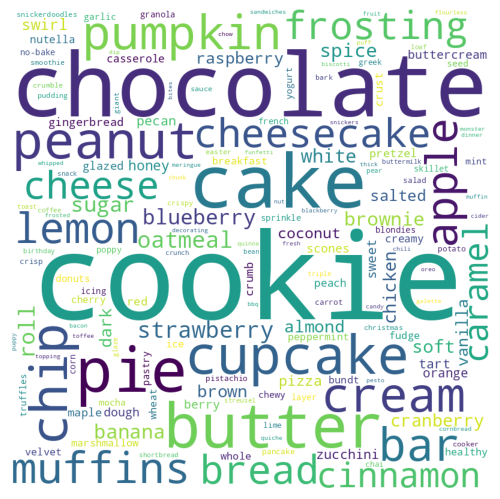

In [7]:
# create a wordcloud
cloud_data = count_keywords.set_index('keywords').to_dict()['counts']
wordcloud2 = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10, max_font_size=200).generate_from_frequencies(cloud_data)
# plot the wordcloud image
plt.figure()
plt.imshow(wordcloud2)
plt.axis('off')
plt.tight_layout(pad=0)

# display wordcloud image:
plt.show()

In this small project, we used web scraping to get data from a recipe website, tokenized the words in recipe titles, found out their frequencies to get an insight into the most popular ingredients/dishes, and visualized it using a wordcloud. This exercise only proved to me that anyone can use their skills to explore whatever interests them at the moment and get whatever information they need while having fun and learning something new. This was very powerful and inspiring for me!

_The End. Lemon cookies for all!_